In [6]:
import acquire as a

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler

In [2]:
# 1. Acquisition of zillow data given the needed parameters
zillow = a.acquire_zillow()

Using cached csv


/var/folders/pt/3m3r1rq55pdgzpmnqzkdjb240000gn/T/ipykernel_16063/2572238944.py:2: DtypeWarning: Columns (63) have mixed types.Specify dtype option on import or set low_memory=False.
  zillow = a.acquire_zillow()


In [7]:
zillow.head()

,id,parcelid,airconditioningtypeid,architecturalstyletypeid,basementsqft,bathroomcnt,bedroomcnt,buildingclasstypeid,buildingqualitytypeid,calculatedbathnbr,...,censustractandblock,logerror,transactiondate,airconditioningdesc,architecturalstyledesc,buildingclassdesc,heatingorsystemdesc,propertylandusedesc,storydesc,typeconstructiondesc
0,1727539,14297519,NaN,NaN,NaN,3.5,4.0,NaN,NaN,3.5,...,6.059063e+13,0.025595,2017-01-01,NaN,NaN,NaN,NaN,Single Family Residential,NaN,NaN
1,1387261,17052889,NaN,NaN,NaN,1.0,2.0,NaN,NaN,1.0,...,6.111001e+13,0.055619,2017-01-01,NaN,NaN,NaN,NaN,Single Family Residential,NaN,NaN
2,11677,14186244,NaN,NaN,NaN,2.0,3.0,NaN,NaN,2.0,...,6.059022e+13,0.005383,2017-01-01,NaN,NaN,NaN,NaN,Single Family Residential,NaN,NaN
3,2288172,12177905,NaN,NaN,NaN,3.0,4.0,NaN,8.0,3.0,...,6.037300e+13,-0.103410,2017-01-01,NaN,NaN,NaN,Central,Single Family Residential,NaN,NaN
4,1970746,10887214,1.0,NaN,NaN,3.0,3.0,NaN,8.0,3.0,...,6.037124e+13,0.006940,2017-01-01,Central,NaN,NaN,Central,Condominium,NaN,NaN


In [9]:
zillow.shape

(77574, 68)

In [10]:
zillow.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 77574 entries, 0 to 77573
Data columns (total 68 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   id                            77574 non-null  int64  
 1   parcelid                      77574 non-null  int64  
 2   airconditioningtypeid         25006 non-null  float64
 3   architecturalstyletypeid      206 non-null    float64
 4   basementsqft                  50 non-null     float64
 5   bathroomcnt                   77574 non-null  float64
 6   bedroomcnt                    77574 non-null  float64
 7   buildingclasstypeid           15 non-null     float64
 8   buildingqualitytypeid         49808 non-null  float64
 9   calculatedbathnbr             76959 non-null  float64
 10  decktypeid                    614 non-null    float64
 11  finishedfloor1squarefeet      6035 non-null   float64
 12  calculatedfinishedsquarefeet  77374 non-null  float64
 13  f

In [14]:
zillow.isnull().sum().sort_values(ascending=False)[:50]

buildingclassdesc               77559
buildingclasstypeid             77559
finishedsquarefeet13            77532
storytypeid                     77524
basementsqft                    77524
storydesc                       77524
yardbuildingsqft26              77504
fireplaceflag                   77402
architecturalstyletypeid        77368
architecturalstyledesc          77368
typeconstructiondesc            77352
typeconstructiontypeid          77352
finishedsquarefeet6             77188
pooltypeid10                    77109
decktypeid                      76960
poolsizesum                     76705
pooltypeid2                     76500
hashottuborspa                  76035
yardbuildingsqft17              75181
taxdelinquencyyear              74674
taxdelinquencyflag              74674
finishedsquarefeet15            74547
finishedsquarefeet50            71539
finishedfloor1squarefeet        71539
fireplacecnt                    69287
threequarterbathnbr             67469
pooltypeid7 

In [17]:
# Let's do some visualizations
def plot_cats_and_cons(df, conts, cats):
    for col in conts:
        sns.displot(x=col, data=df, kind='kde')
        plt.show()
        sns.boxplot(df[col])
        plt.show()
        sns.histplot(df[col])
        plt.show()
    for col in cats:
        sns.countplot(x=col, data=df)
        plt.show()

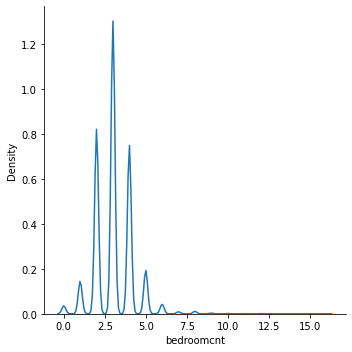

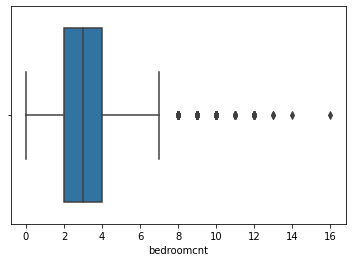

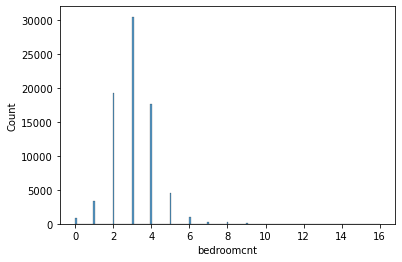

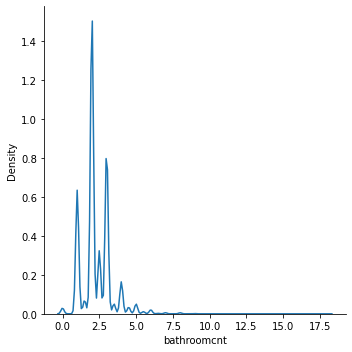

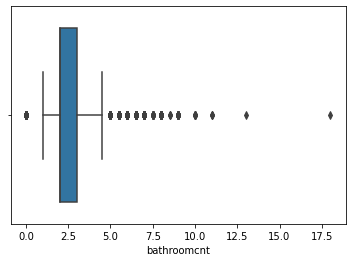

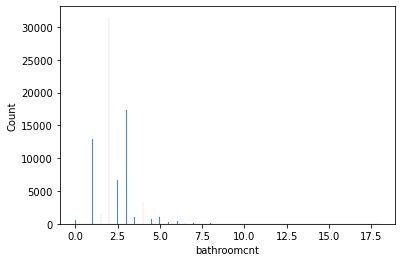

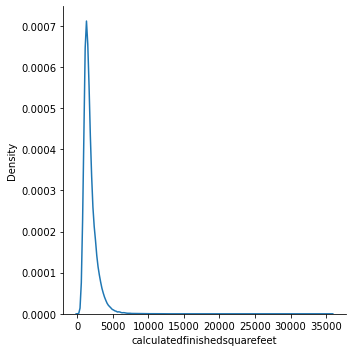

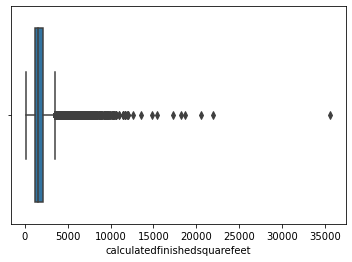

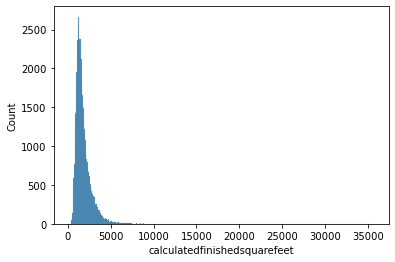

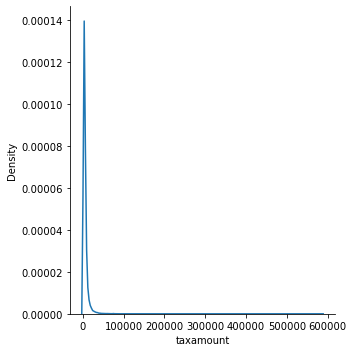

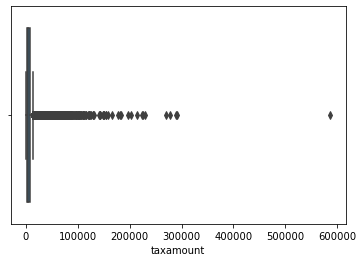

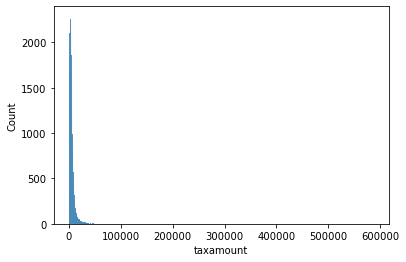

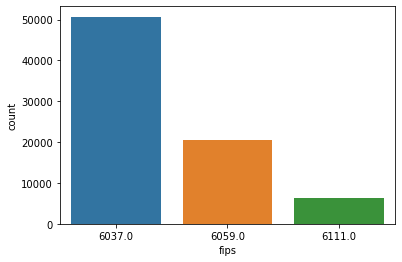

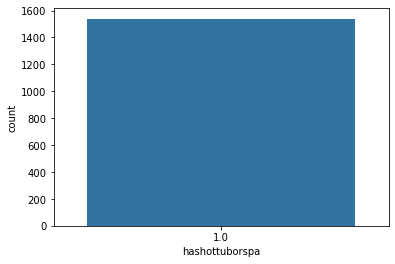

In [18]:
conts = ['bedroomcnt', 'bathroomcnt', 'calculatedfinishedsquarefeet', 'taxamount']
cats = ['fips', 'hashottuborspa']
plot_cats_and_cons(zillow, conts, cats)

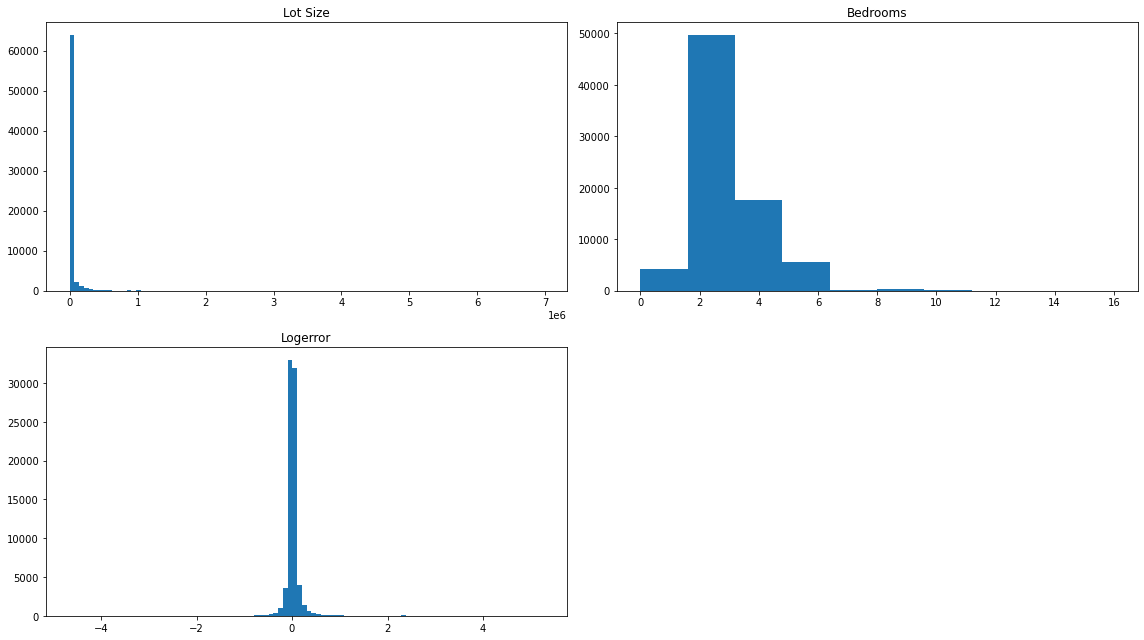

In [27]:
plt.figure(figsize=(16,9))
plt.subplot(221)
plt.hist(zillow.lotsizesquarefeet, bins= 100)
plt.title('Lot Size')

plt.subplot(222)
plt.hist(zillow.bedroomcnt, bins=10)
plt.title('Bedrooms')

plt.subplot(223)
plt.hist(zillow.logerror, bins = 100)
plt.title('Logerror')

plt.tight_layout()

3. Write a function that takes in a dataframe of observations and attributes and returns a dataframe where each row is an atttribute name, the first column is the number of rows with missing values for that attribute, and the second column is percent of total rows that have missing values for that attribute. Run the function and document takeaways from this on how you want to handle missing values.